In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('/content/titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

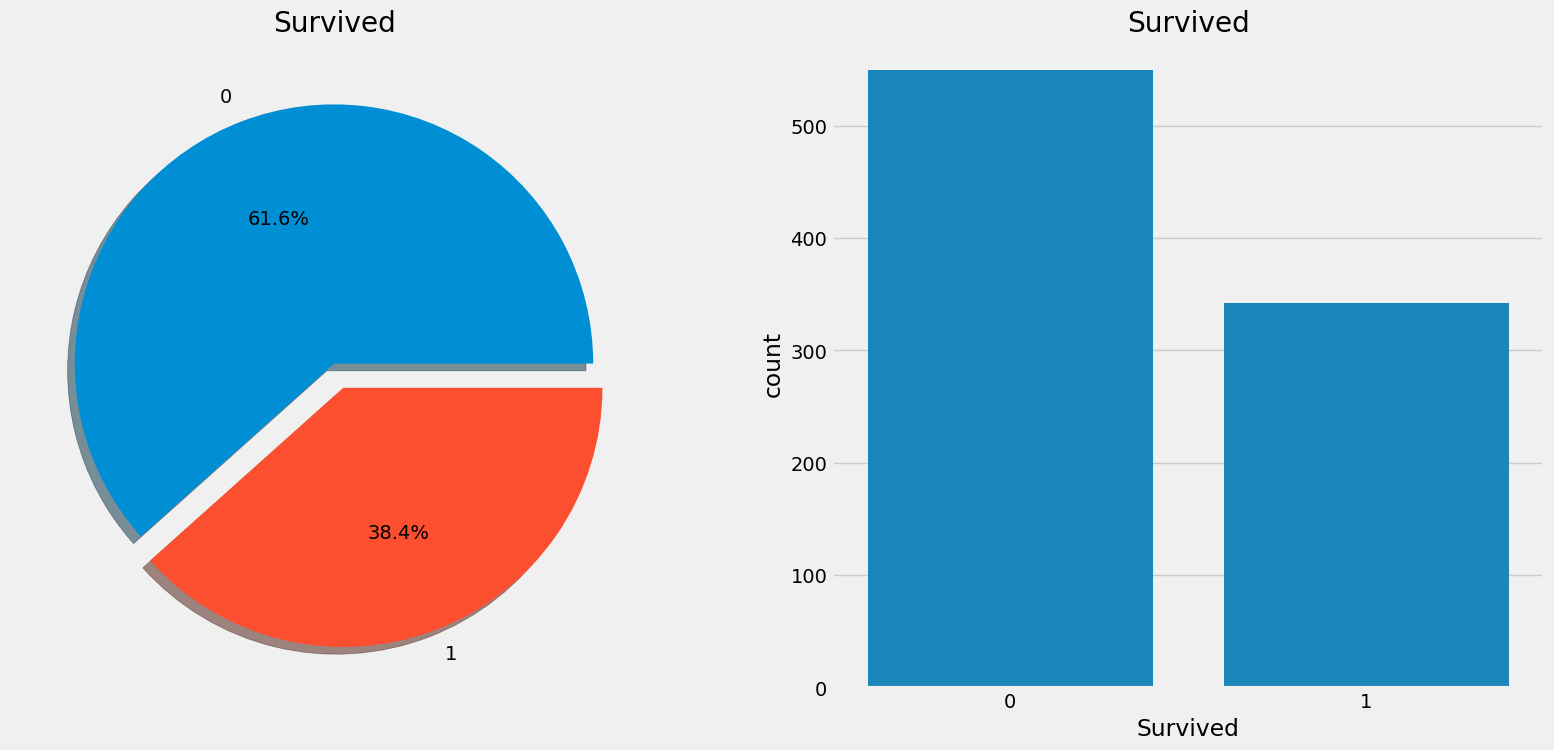

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

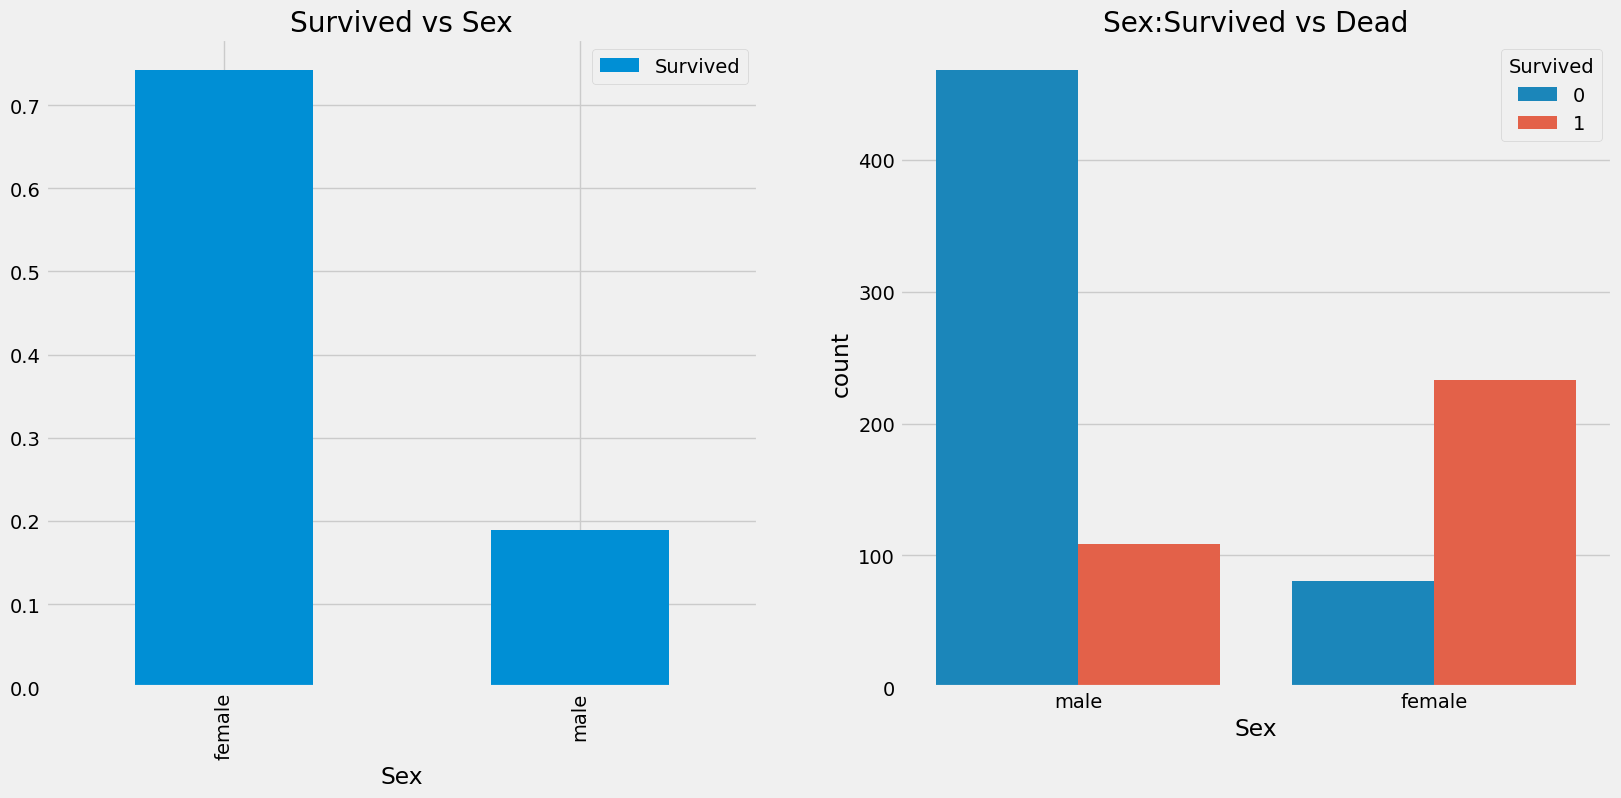

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])

ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


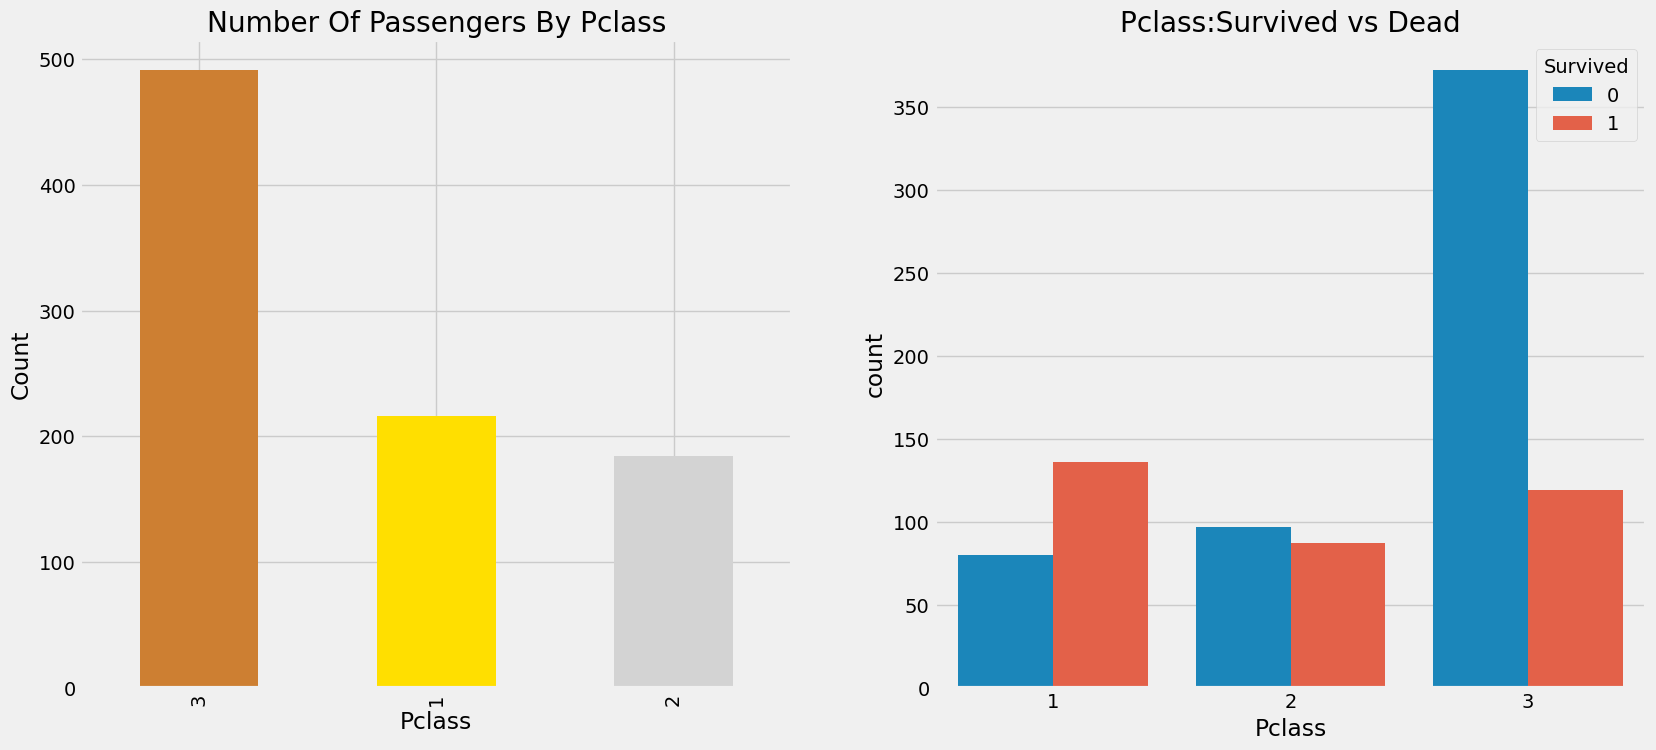

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])

ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

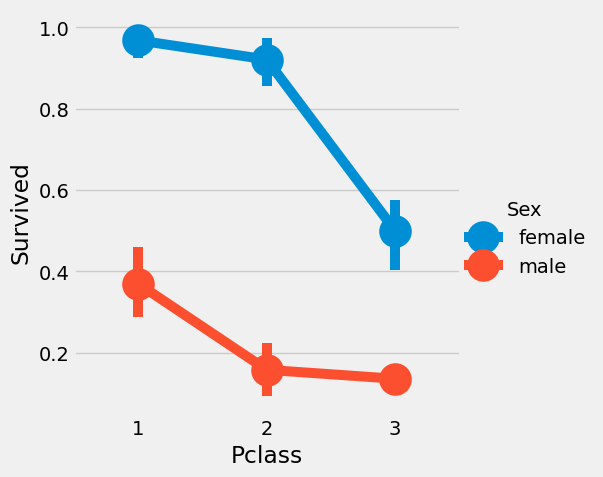

In [11]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()


In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


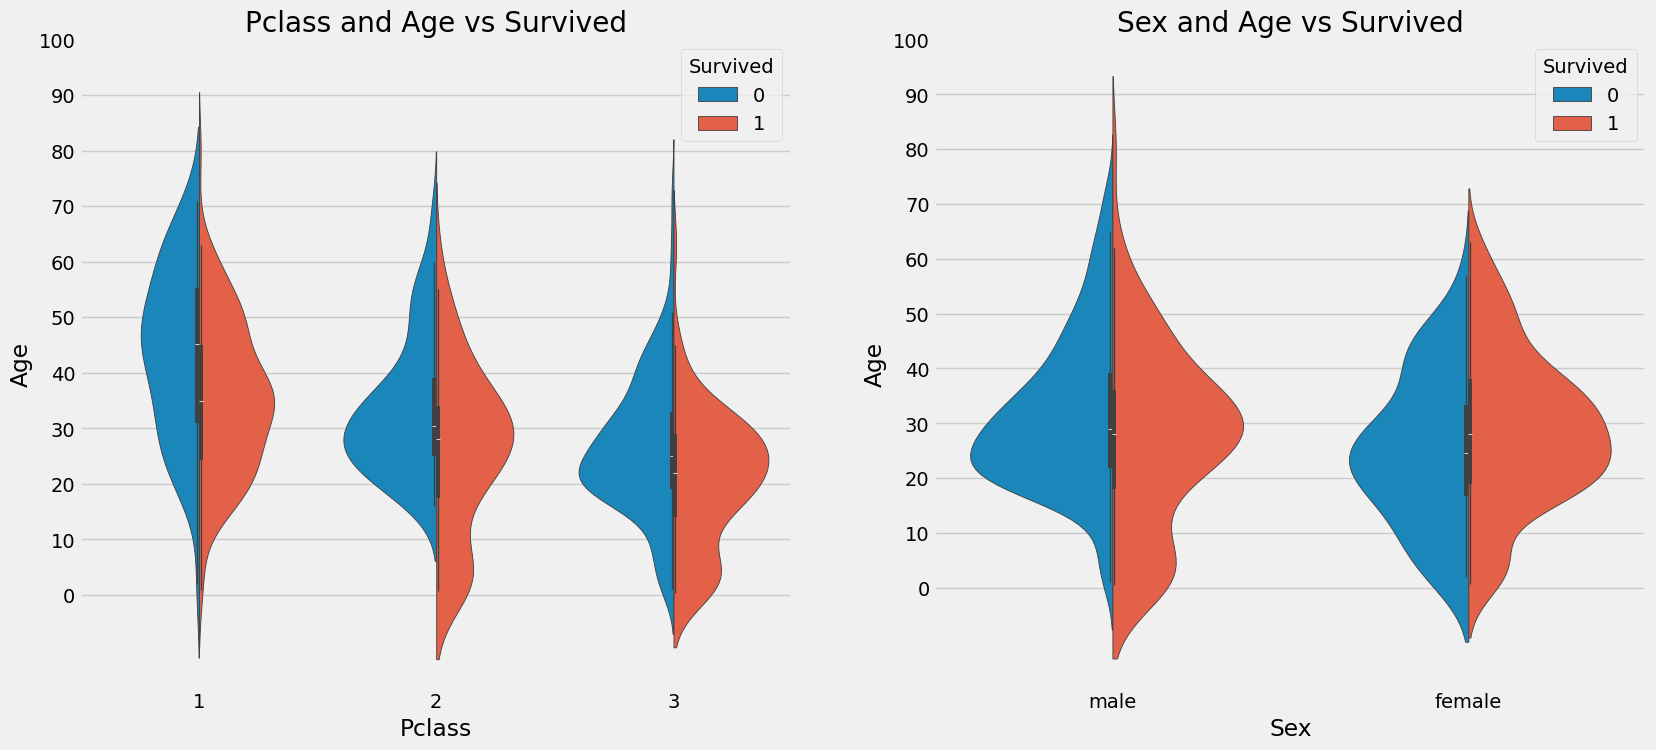

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()


In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally

False

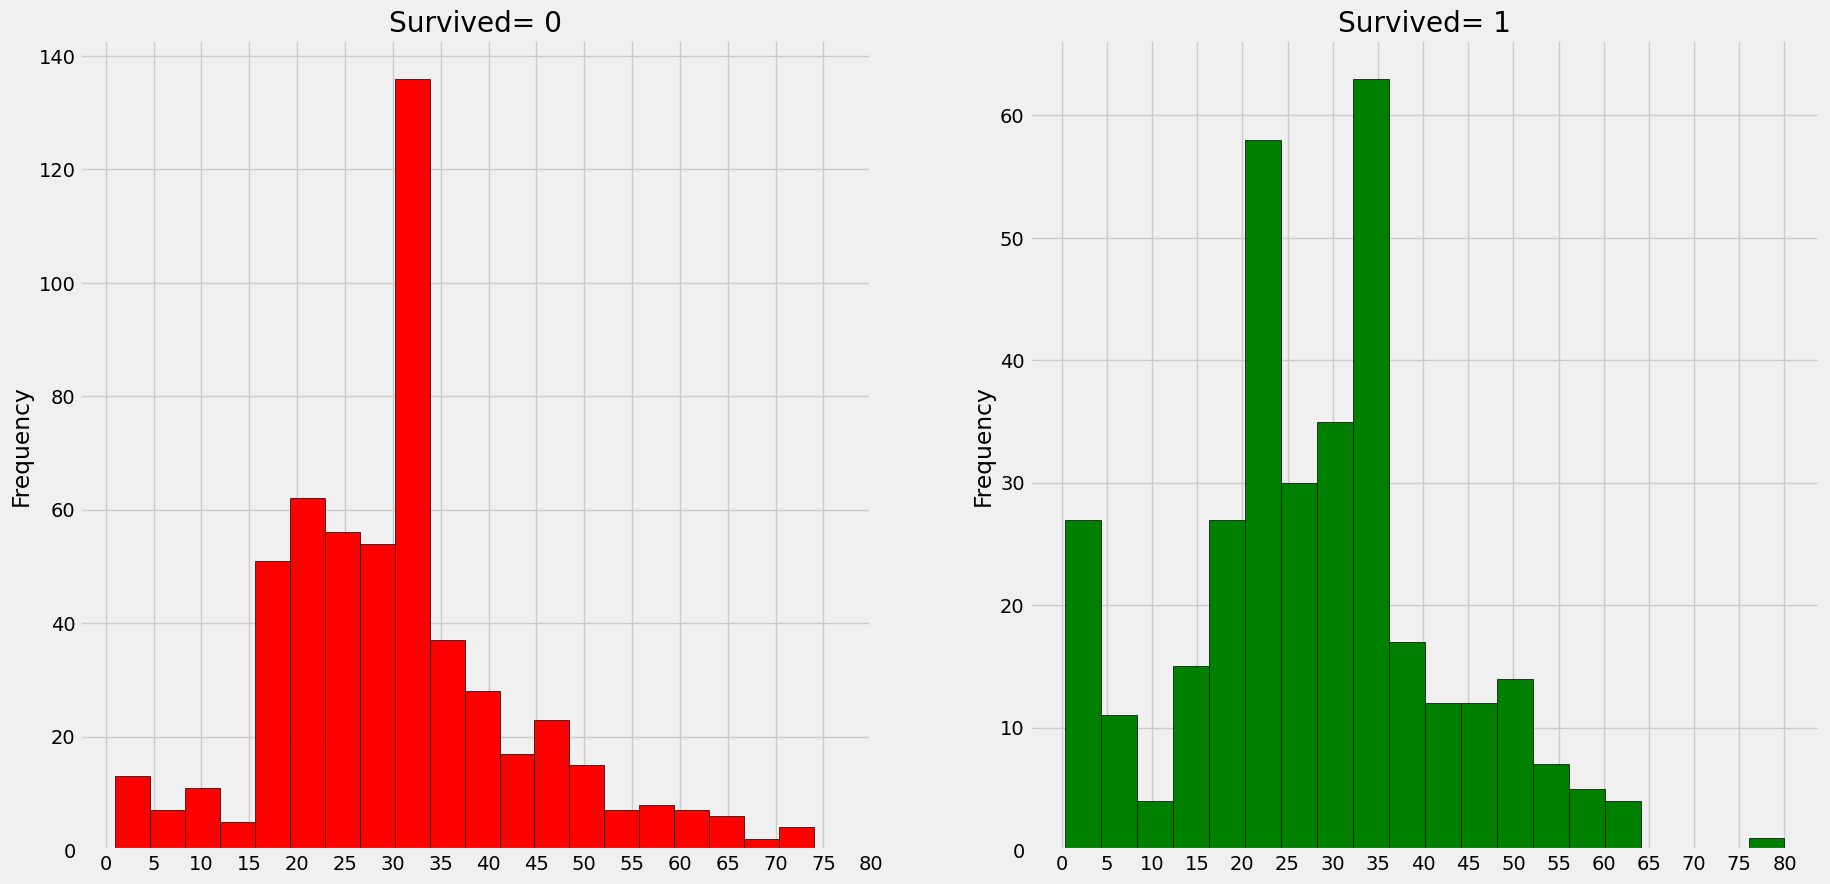

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

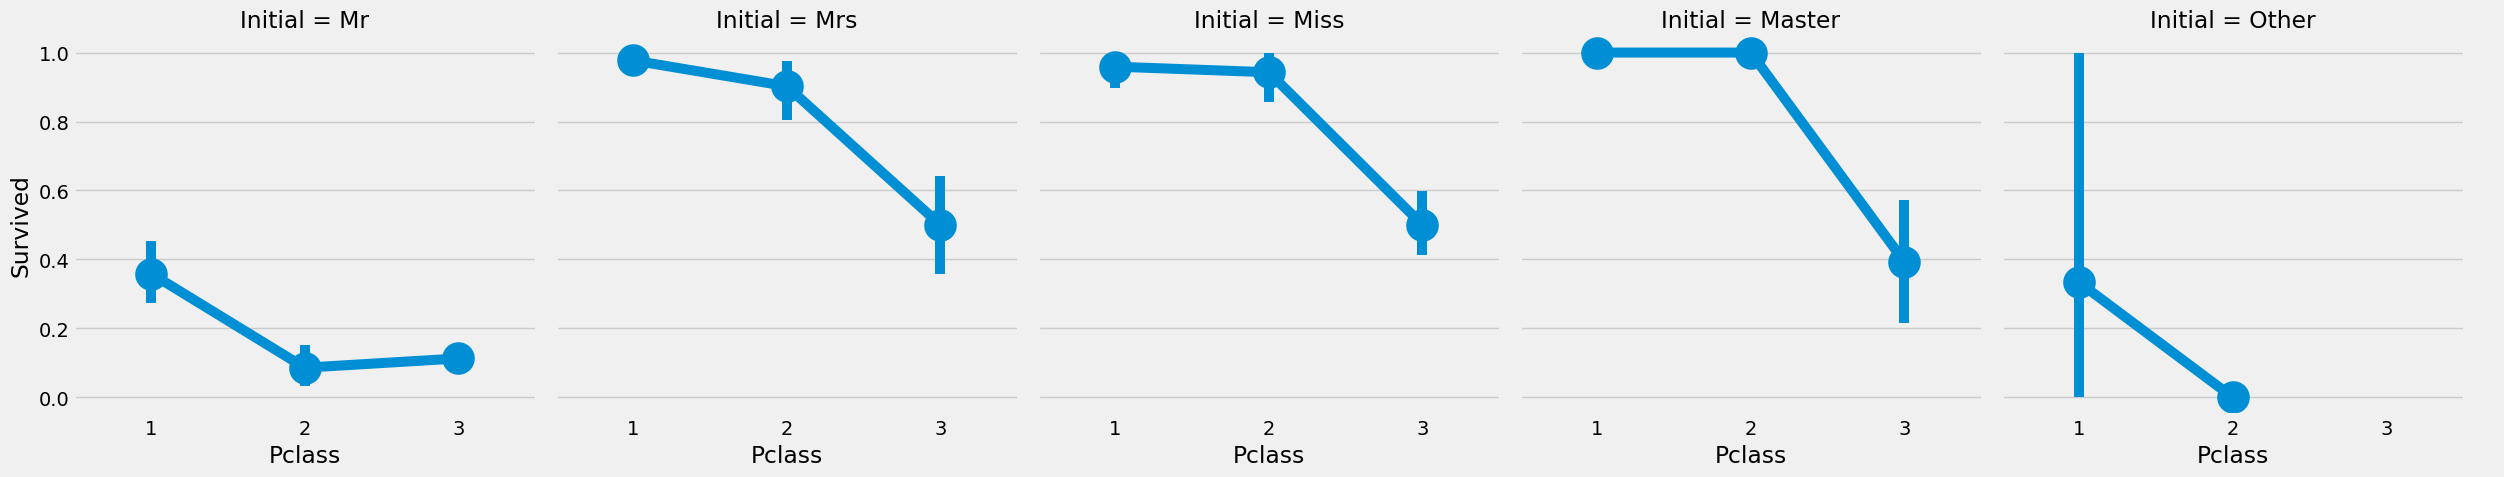

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()


In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

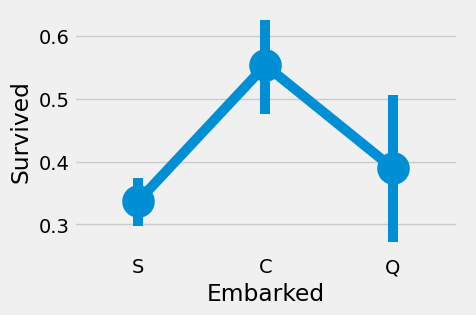

In [23]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()


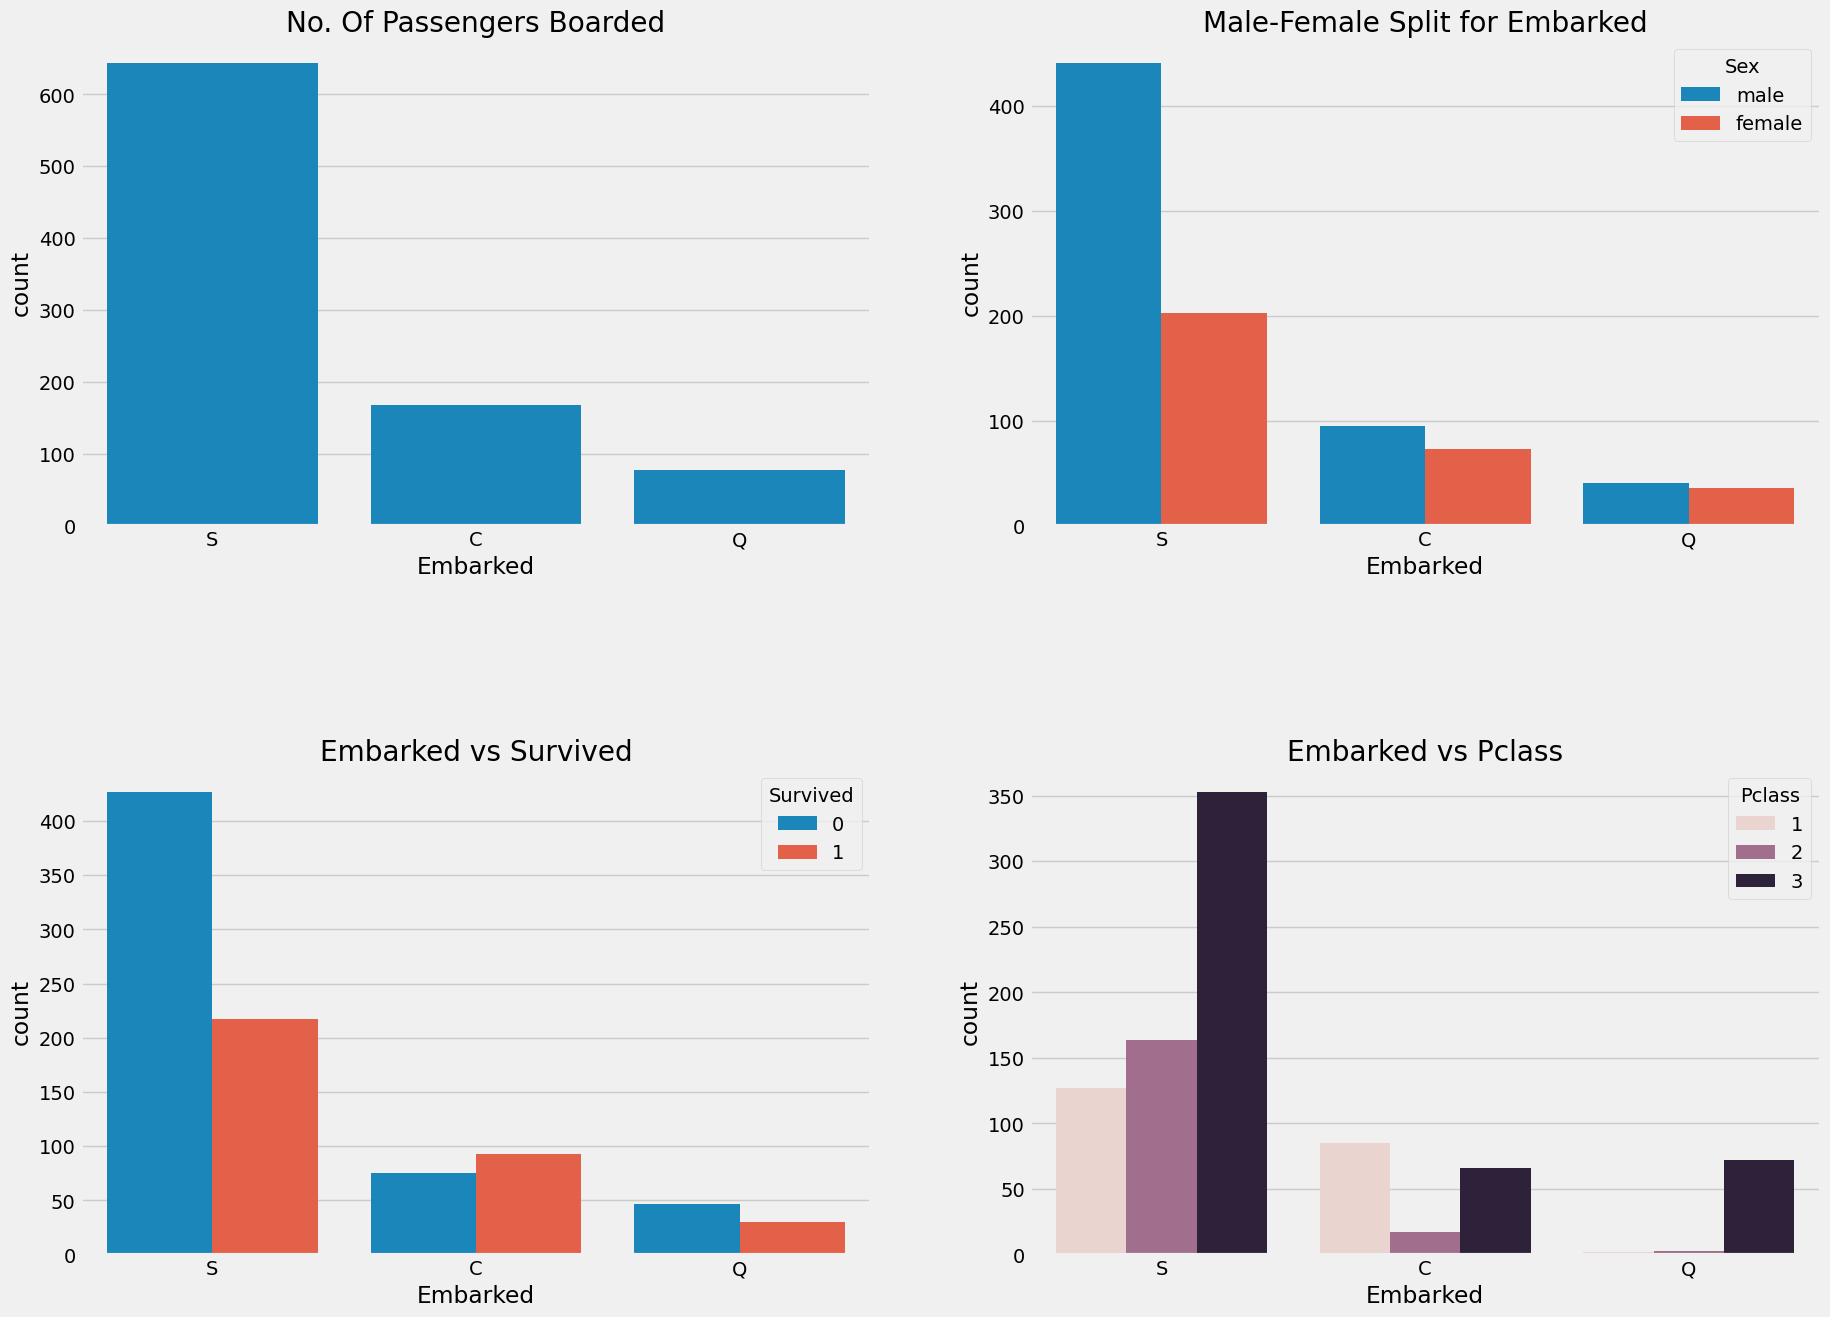

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


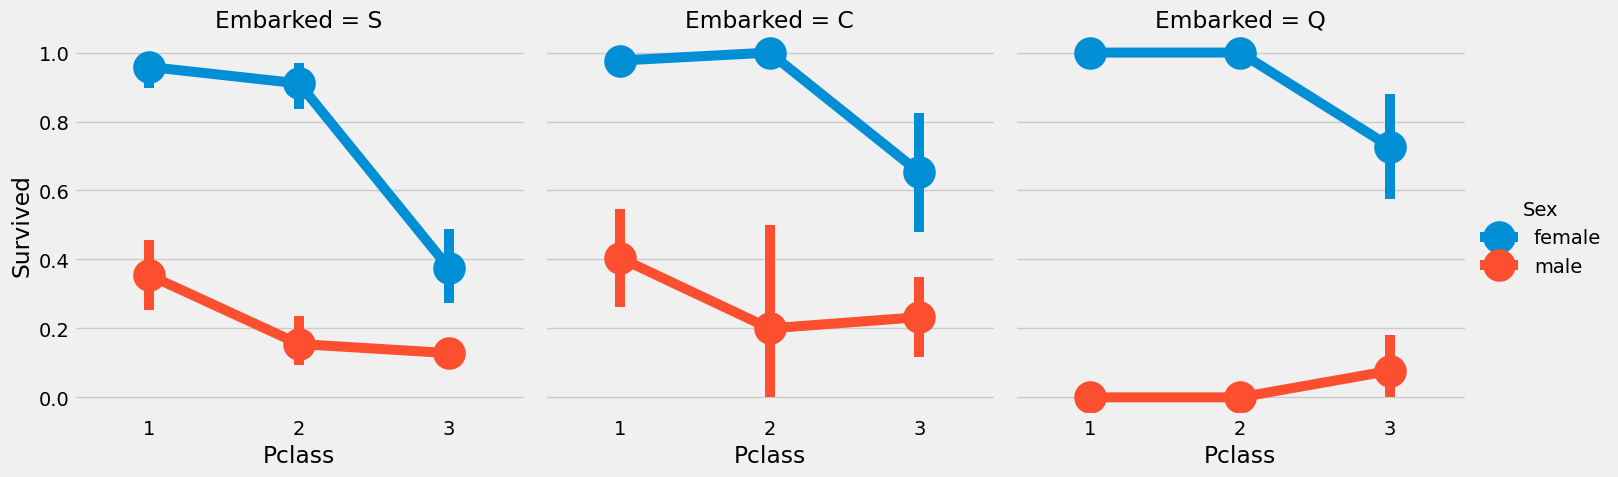

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()


In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()# Finally No NaN values

False

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])

ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp', y='Survived', data=data, ax=ax[1])

ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

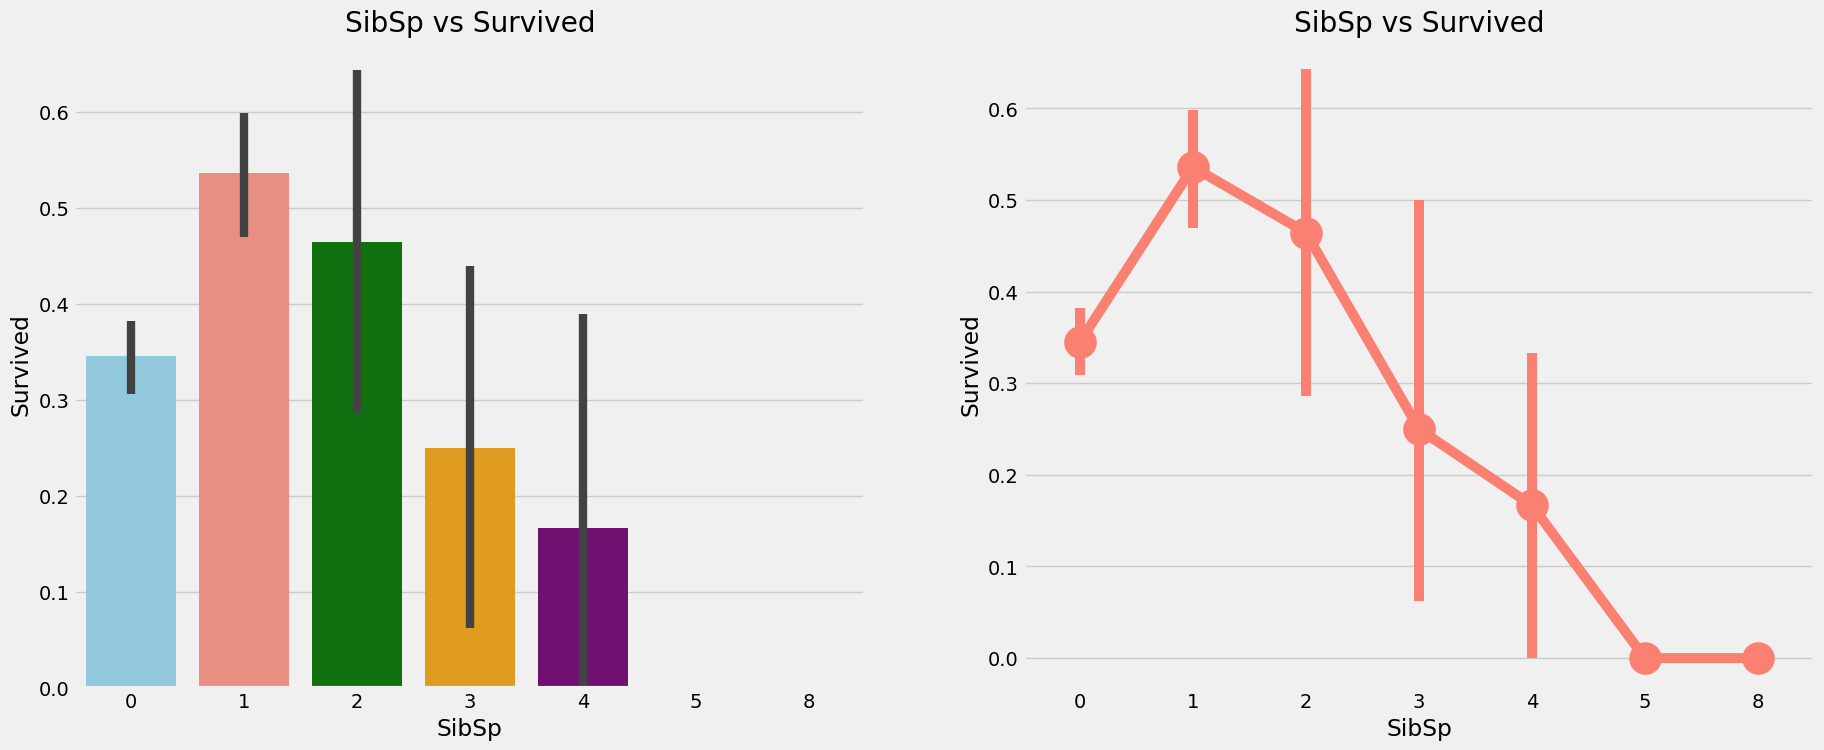

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each bar
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot (barplot)
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0], palette=colors)
ax[0].set_title('SibSp vs Survived')

# Second subplot (catplot with kind='point')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1], color='salmon')
ax[1].set_title('SibSp vs Survived')

plt.show()


In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


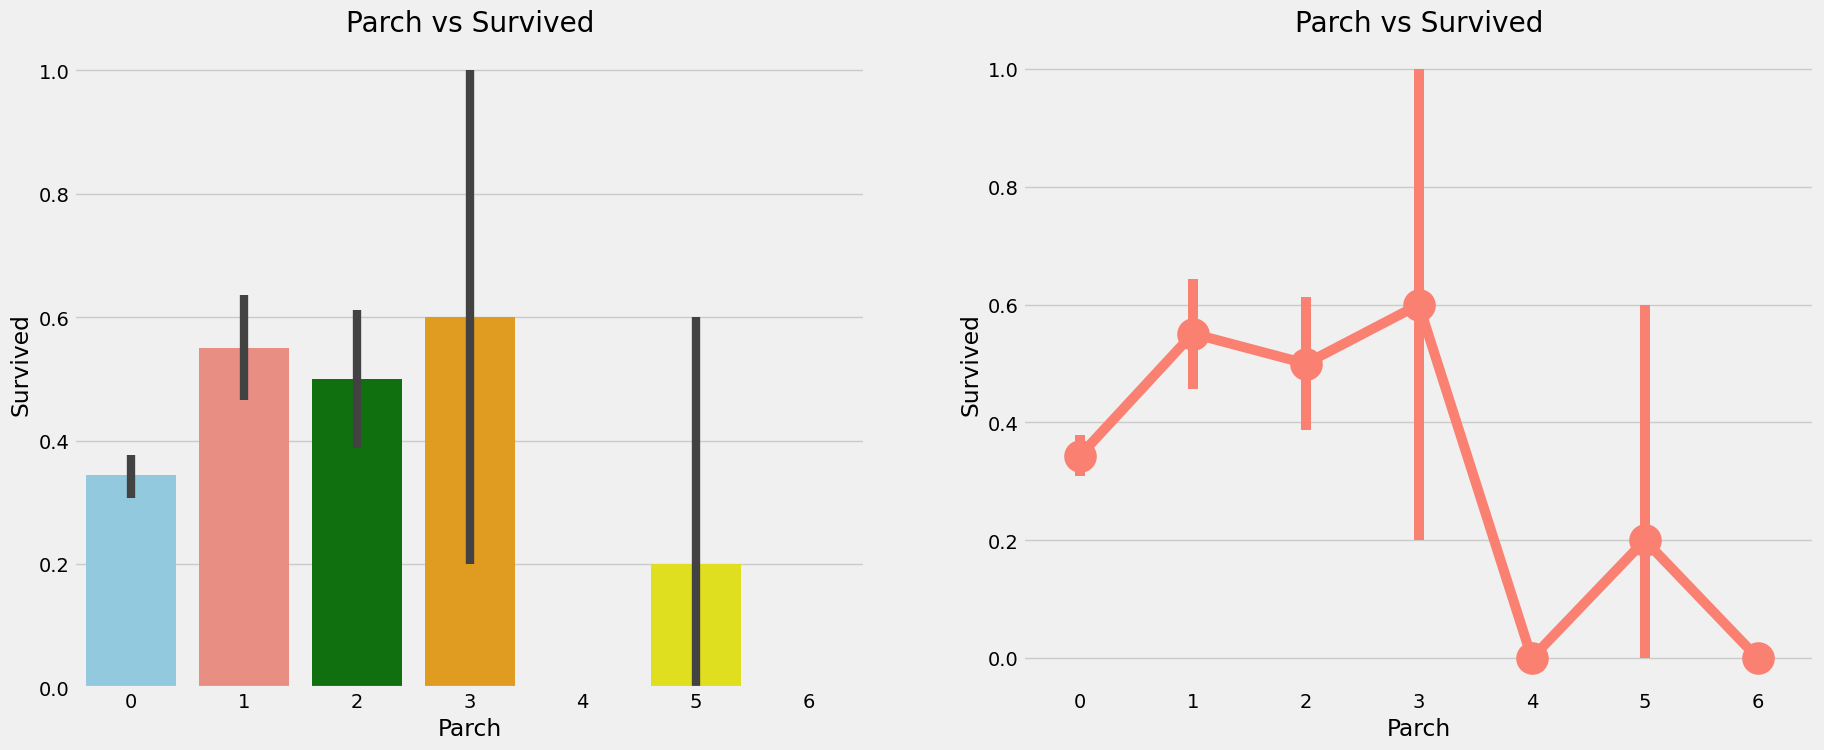

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each bar
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot (barplot)
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0], palette=colors)
ax[0].set_title('Parch vs Survived')

# Second subplot (pointplot with kind='point')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1], color='salmon')
ax[1].set_title('Parch vs Survived')

plt.show()


In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


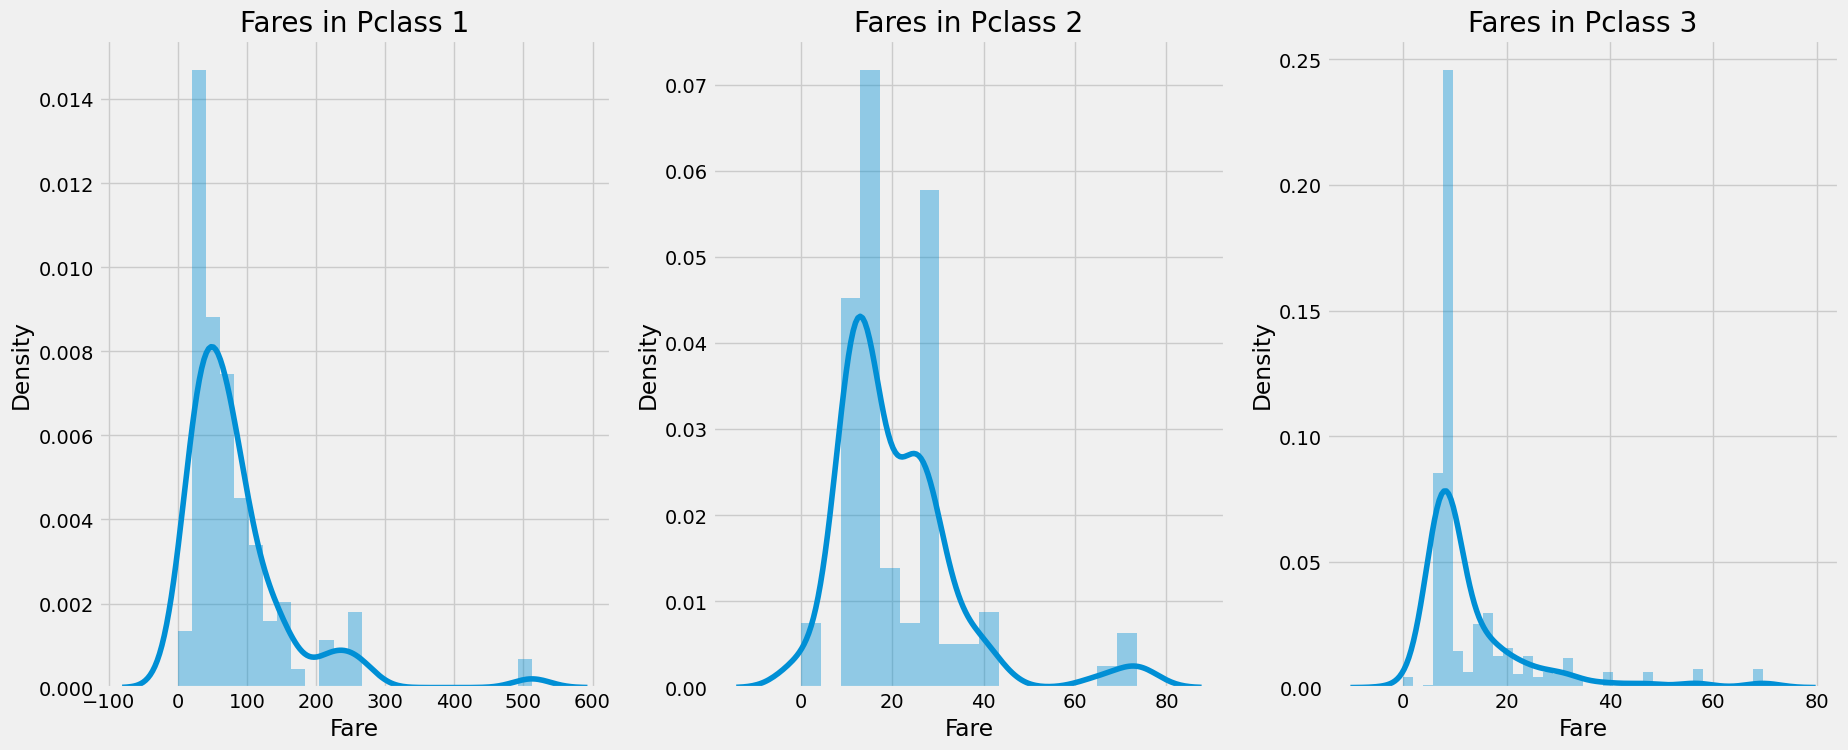

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

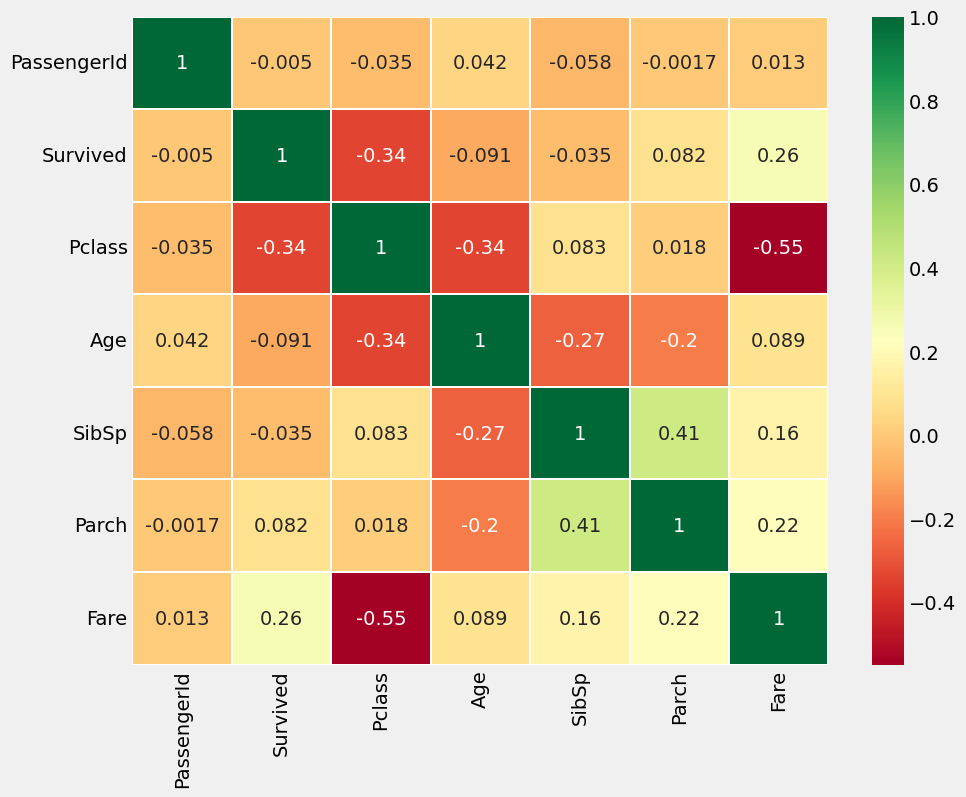

In [35]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include='number')

# Plot the correlation heatmap using only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.gcf().set_size_inches(10, 8)
plt.show()


In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


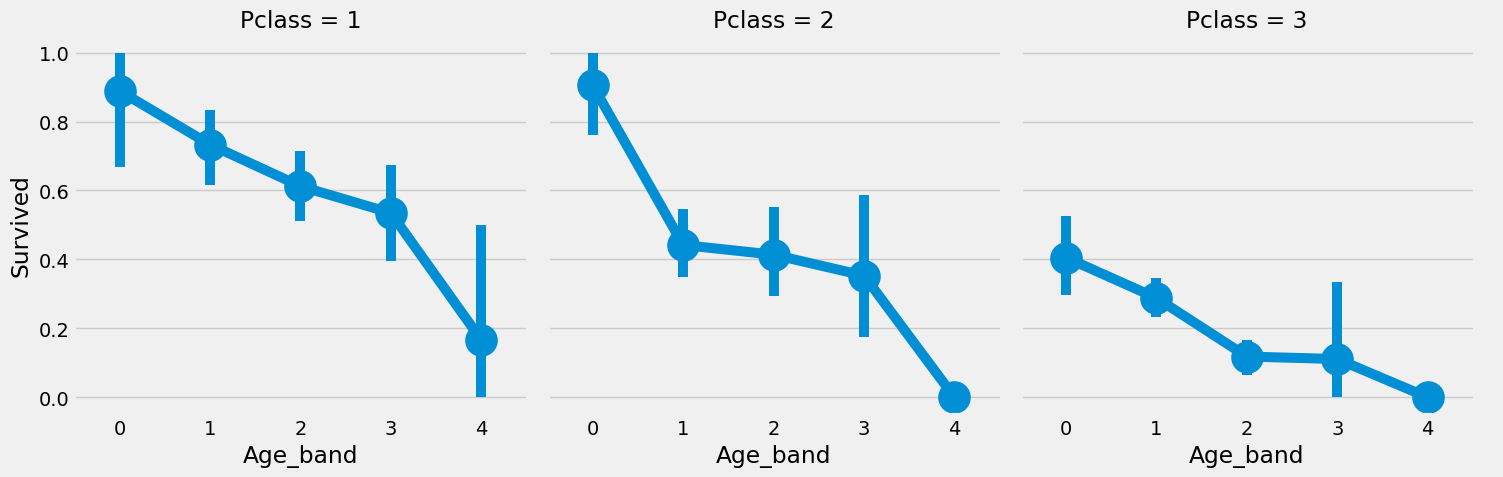

In [38]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()


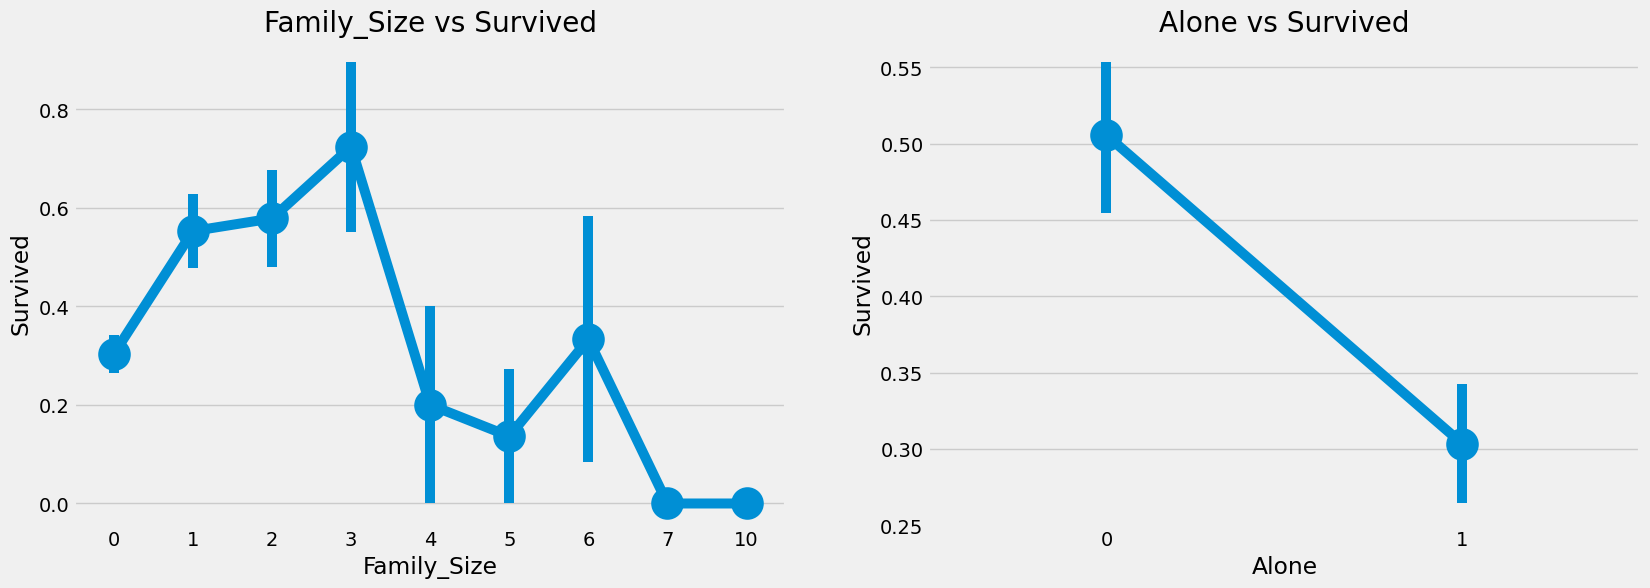

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Family_Size and Alone
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First subplot (Family_Size vs Survived)
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=axes[0])
axes[0].set_title('Family_Size vs Survived')

# Second subplot (Alone vs Survived)
sns.pointplot(x='Alone', y='Survived', data=data, ax=axes[1])
axes[1].set_title('Alone vs Survived')

plt.show()


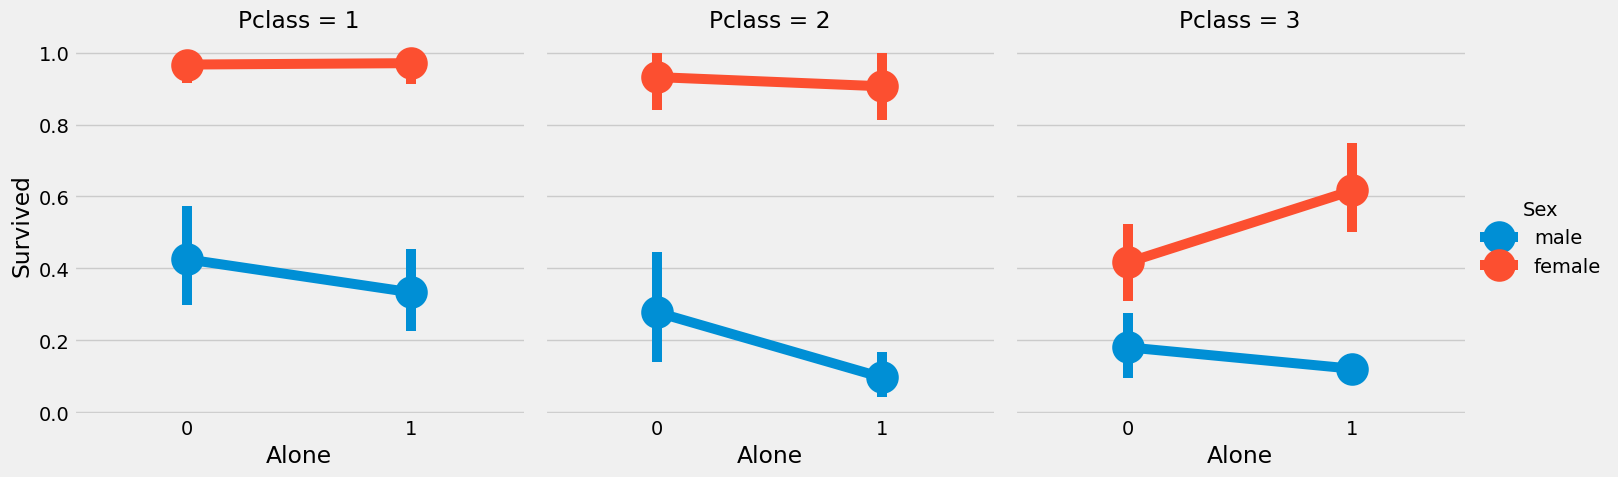

In [40]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()


In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

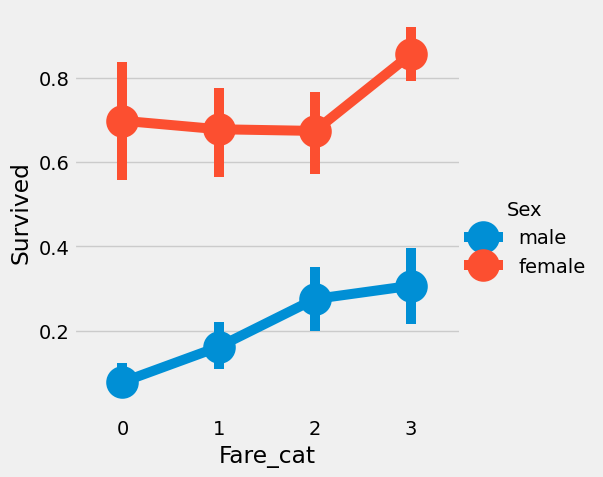

In [43]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()


In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

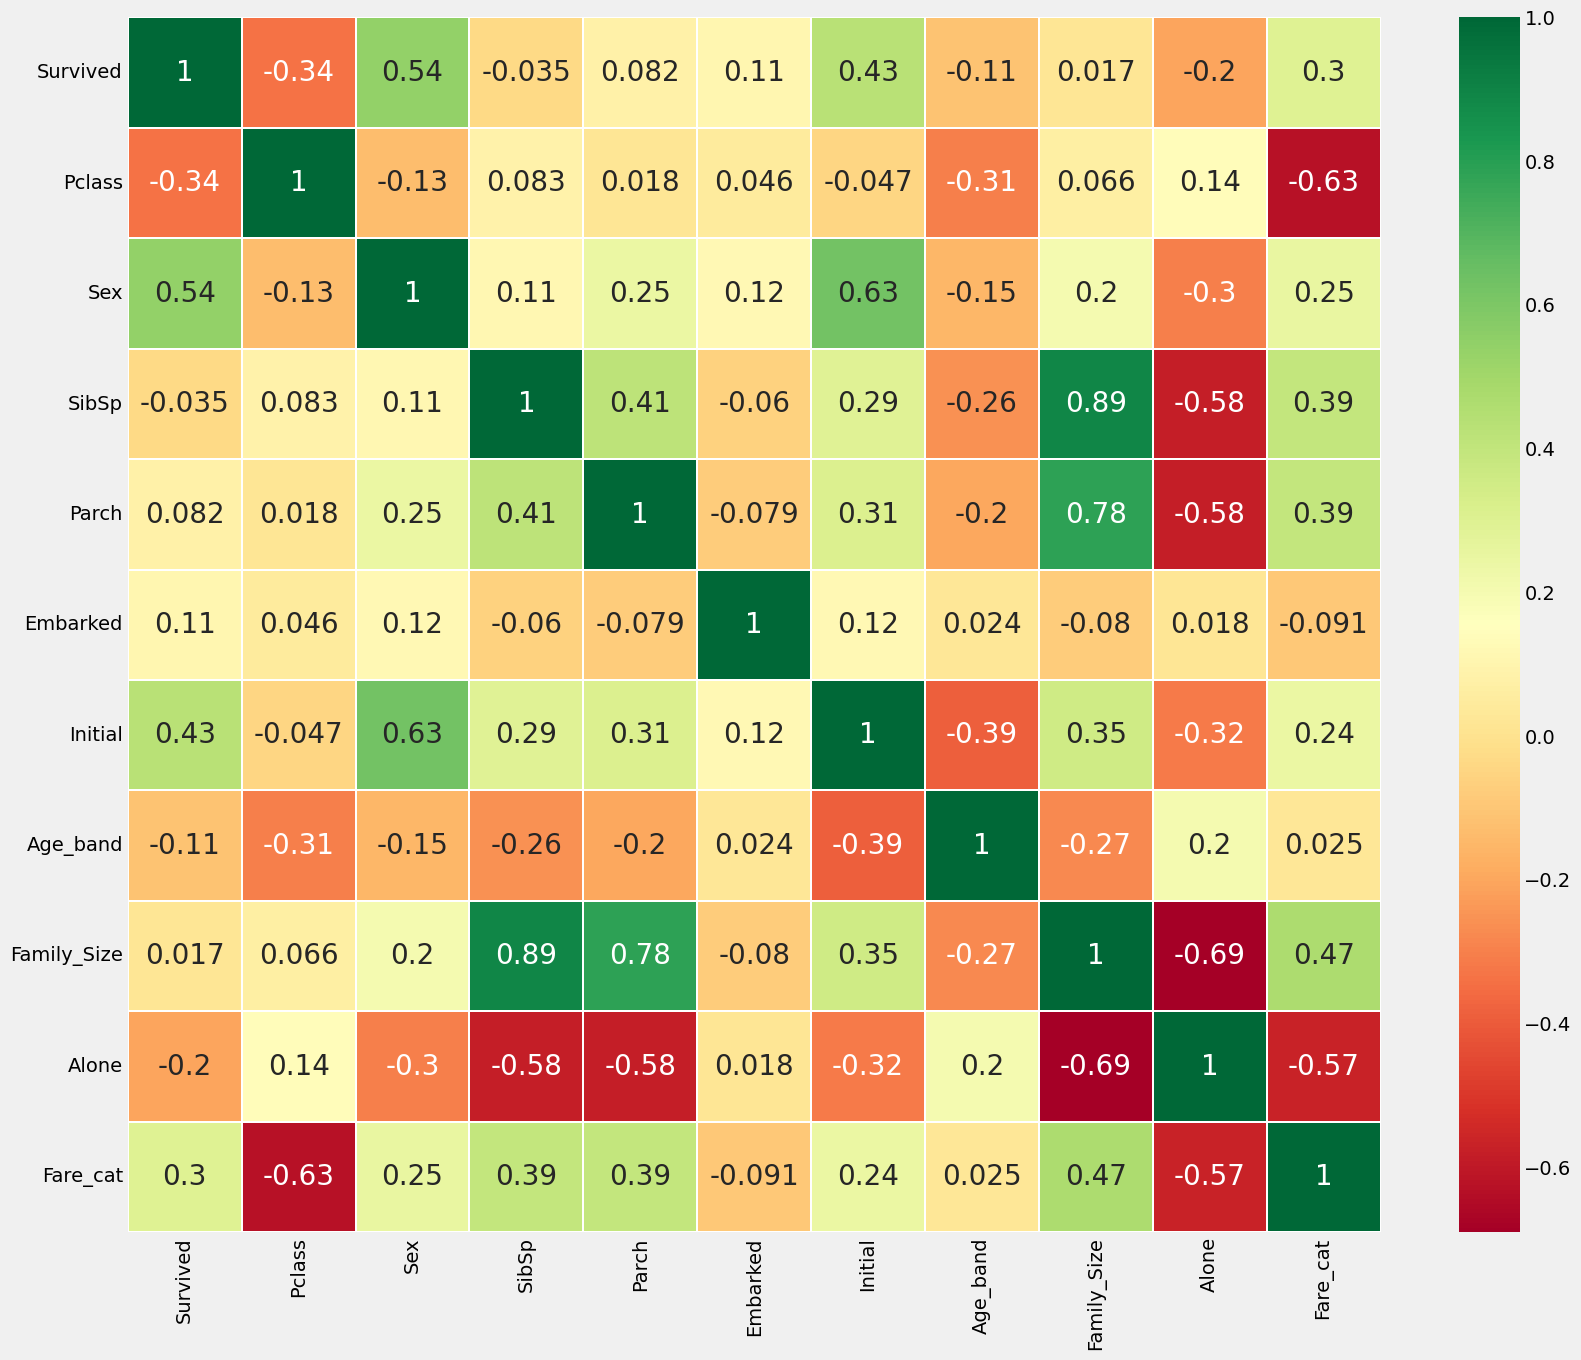

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [48]:
# Drop non-numeric columns like names
train_X_numeric = train_X.select_dtypes(include=['number'])
test_X_numeric = test_X.select_dtypes(include=['number'])

# Train the model on the numerical training data
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X_numeric, train_Y)

# Make predictions on the numerical testing data
prediction1 = model.predict(test_X_numeric)

# Evaluate the accuracy of the model
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))


Accuracy for rbf SVM is 0.835820895522388


In [49]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [52]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


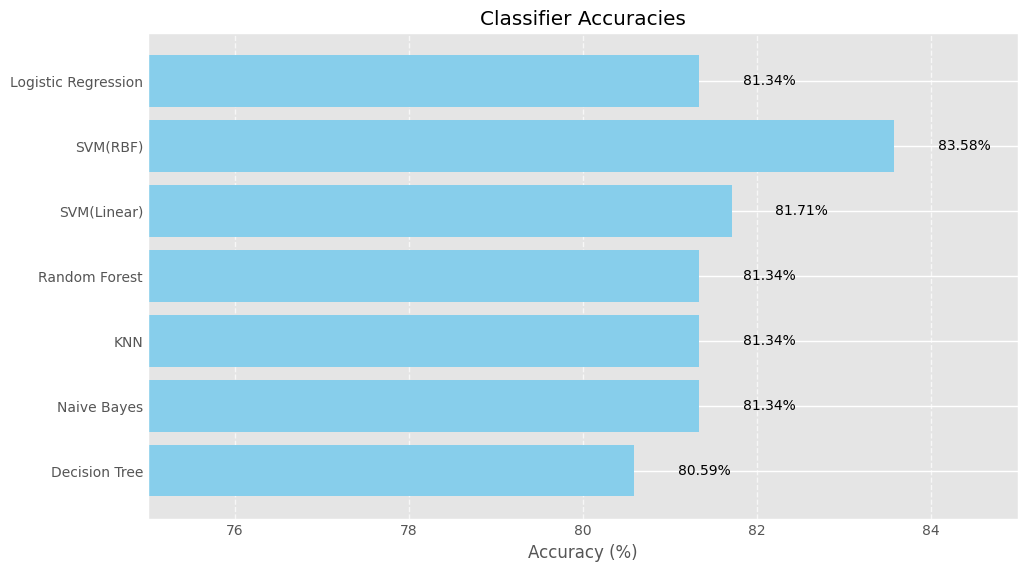

In [68]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Logistic Regression', 'SVM(RBF)', 'SVM(Linear)', 'Random Forest', 'KNN', 'Naive Bayes', 'Decision Tree']

# Accuracy values
accuracies = [81.34, 83.58, 81.71, 81.34, 81.34, 81.34, 80.59]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.xlim(75, 85)  # Adjust the x-axis limits if needed
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.5, i, f'{acc}%', va='center')
plt.show()


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the data into features (X) and target variable (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Splitting the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM (RBF)': svm.SVC(kernel='rbf', C=1, gamma=0.1),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize lists to store evaluation metrics
classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_survived = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(train_X, train_Y)

    # Make predictions
    predictions = clf.predict(test_X)

    # Calculate evaluation metrics
    accuracy = metrics.accuracy_score(test_Y, predictions)
    precision = metrics.precision_score(test_Y, predictions)
    recall = metrics.recall_score(test_Y, predictions)
    f1_score = metrics.f1_score(test_Y, predictions)
    support = metrics.precision_recall_fscore_support(test_Y, predictions)[3][1]  # Support for Survived

    # Append evaluation metrics to the lists
    classifier_names.append(clf_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    support_survived.append(support)

# Create a DataFrame to display evaluation metrics
metrics_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support Survived': support_survived
})

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|     Classifier      |      Accuracy      |     Precision      |       Recall       |      F1 Score      | Support Survived |
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
| Logistic Regression | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |       103        |
|      SVM (RBF)      | 0.835820895522388  | 0.8390804597701149 | 0.7087378640776699 | 0.7684210526315789 |       103        |
|    SVM (Linear)     | 0.8171641791044776 |      0.78125       | 0.7281553398058253 | 0.7537688442211056 |       103        |
|    Random Forest    | 0.8208955223880597 | 0.8235294117647058 | 0.6796116504854369 | 0.7446808510638298 |       103        |
|         KNN         | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |    

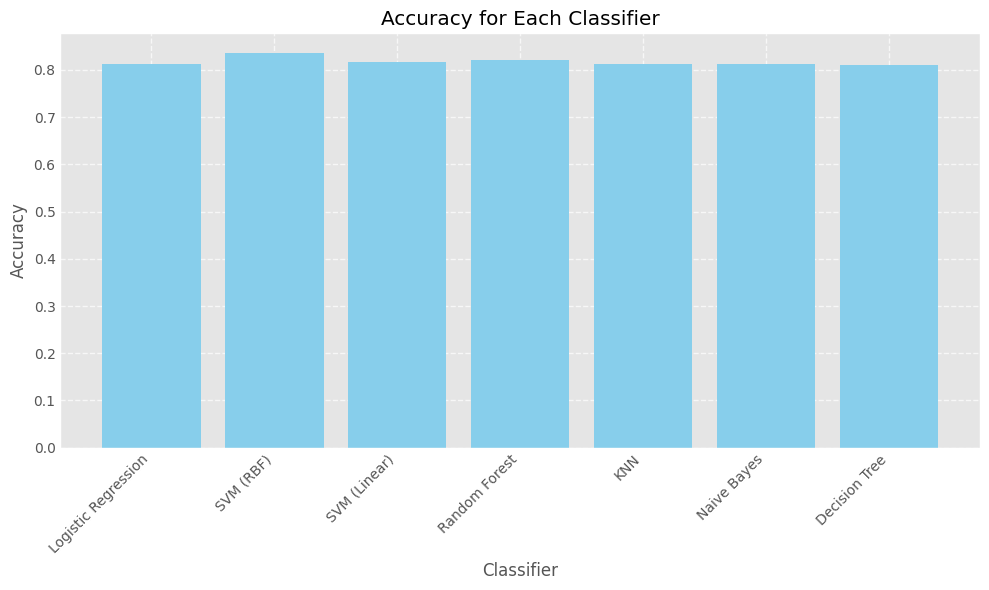

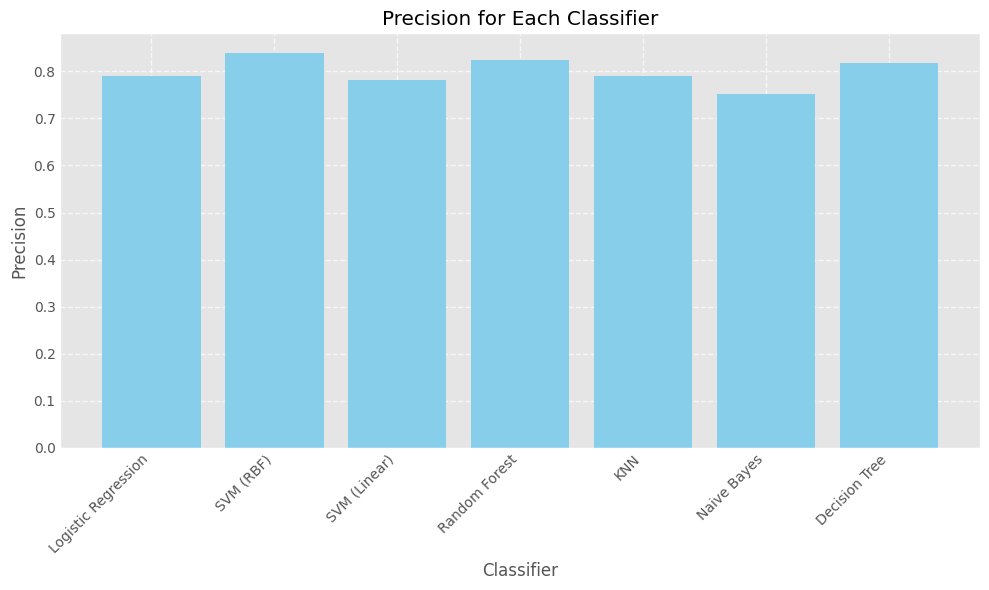

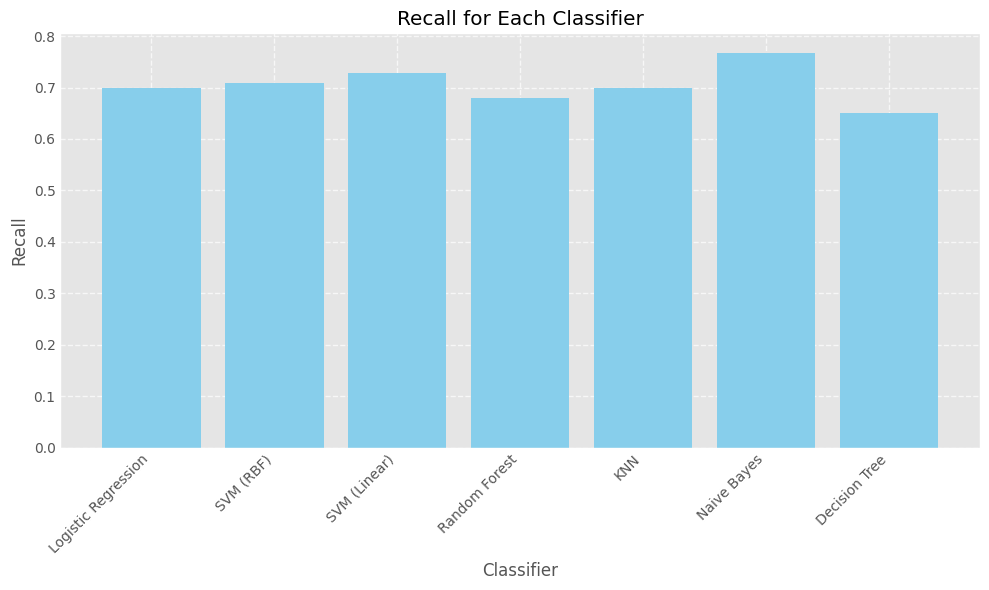

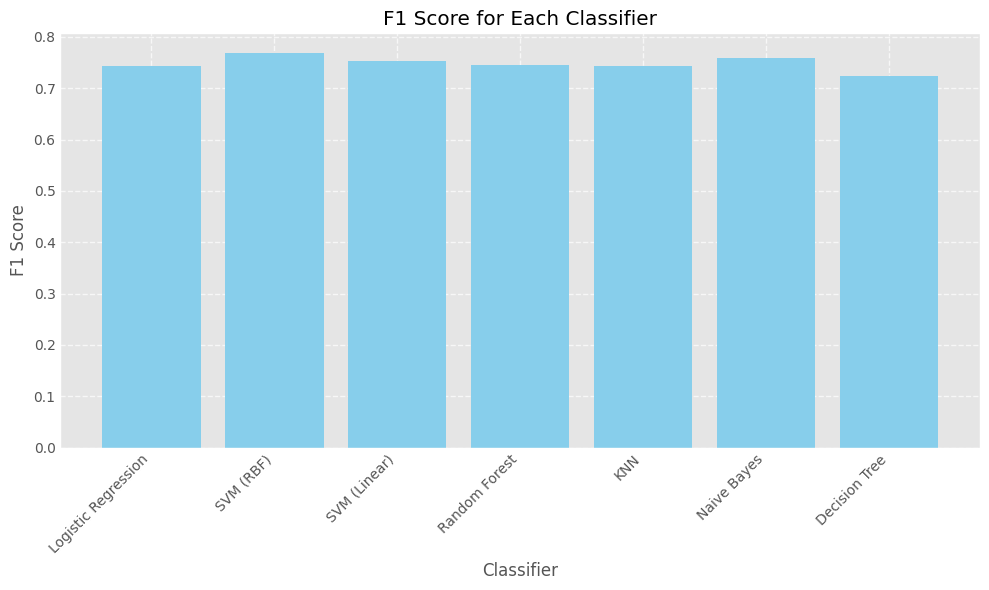

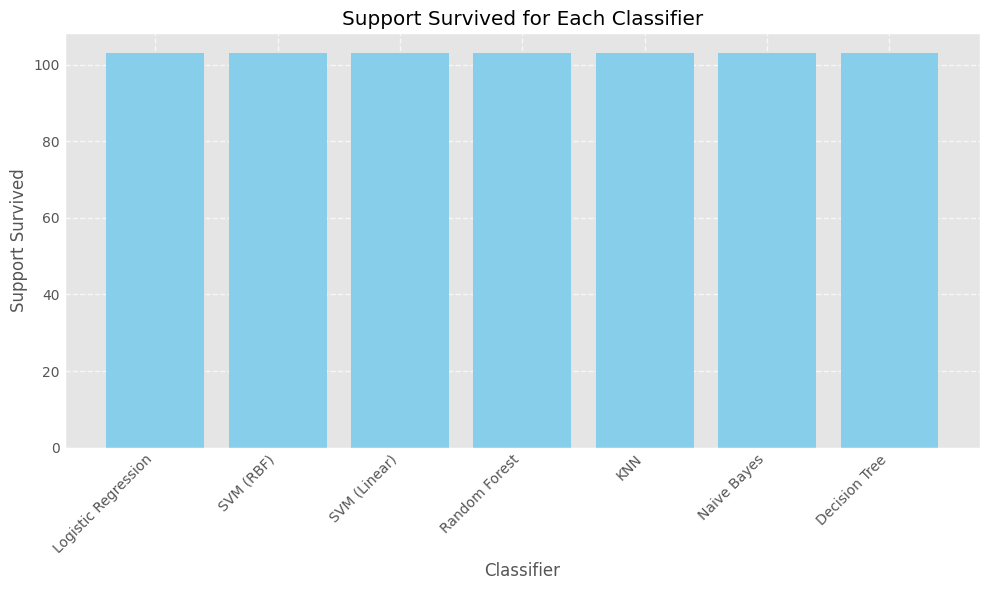

In [59]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Define the metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support Survived']

# Plot each metric separately
for metric in metrics_to_plot:
    # Create a new figure for each metric
    plt.figure(figsize=(10, 6))

    # Plot the metric for each classifier
    plt.bar(metrics_df['Classifier'], metrics_df[metric], color='skyblue')

    # Add labels and title
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.title(f'{metric} for Each Classifier')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate
import numpy as np

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the data into features (X) and target variable (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Splitting the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM (RBF)': svm.SVC(kernel='rbf', C=1, gamma=0.1),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize lists to store evaluation metrics
classifier_names = []
mae_scores = []
mse_scores = []
rmse_scores = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(train_X, train_Y)

    # Make predictions
    predictions = clf.predict(test_X)

    # Error rate calculations
    mae = metrics.mean_absolute_error(test_Y, predictions)
    mse = metrics.mean_squared_error(test_Y, predictions)
    rmse = np.sqrt(mse)

    # Append evaluation metrics to the lists
    classifier_names.append(clf_name)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Create a DataFrame to display error rates
error_rates_df = pd.DataFrame({
    'Classifier': classifier_names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores
})

# Display the DataFrame using tabulate
print(tabulate(error_rates_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+---------------------+---------------------+---------------------+
|     Classifier      |         MAE         |         MSE         |        RMSE         |
+---------------------+---------------------+---------------------+---------------------+
| Logistic Regression | 0.1865671641791045  | 0.1865671641791045  | 0.43193421279068006 |
|      SVM (RBF)      | 0.16417910447761194 | 0.16417910447761194 | 0.4051902077760665  |
|    SVM (Linear)     | 0.1828358208955224  | 0.1828358208955224  | 0.4275930552470683  |
|    Random Forest    | 0.1865671641791045  | 0.1865671641791045  | 0.43193421279068006 |
|         KNN         | 0.1865671641791045  | 0.1865671641791045  | 0.43193421279068006 |
|     Naive Bayes     | 0.1865671641791045  | 0.1865671641791045  | 0.43193421279068006 |
|    Decision Tree    | 0.20149253731343283 | 0.20149253731343283 | 0.4488792012484348  |
+---------------------+---------------------+---------------------+---------------------+


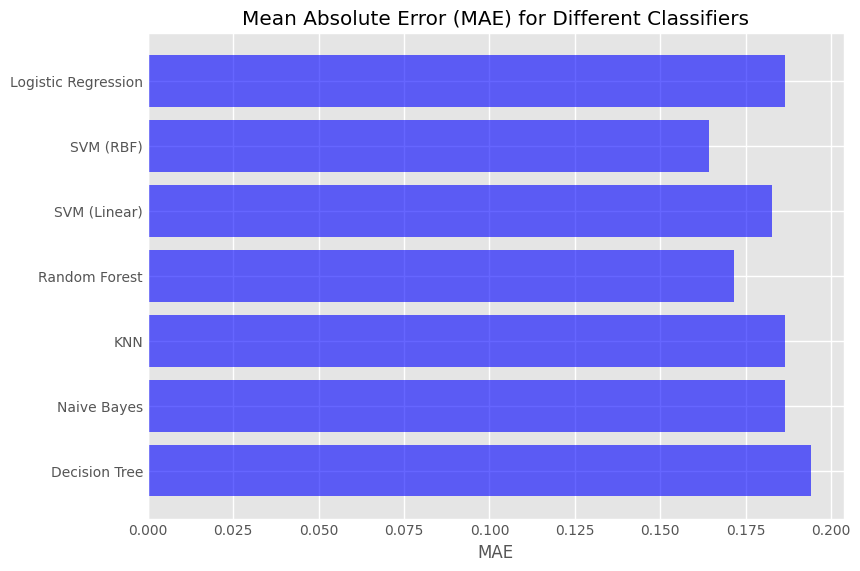

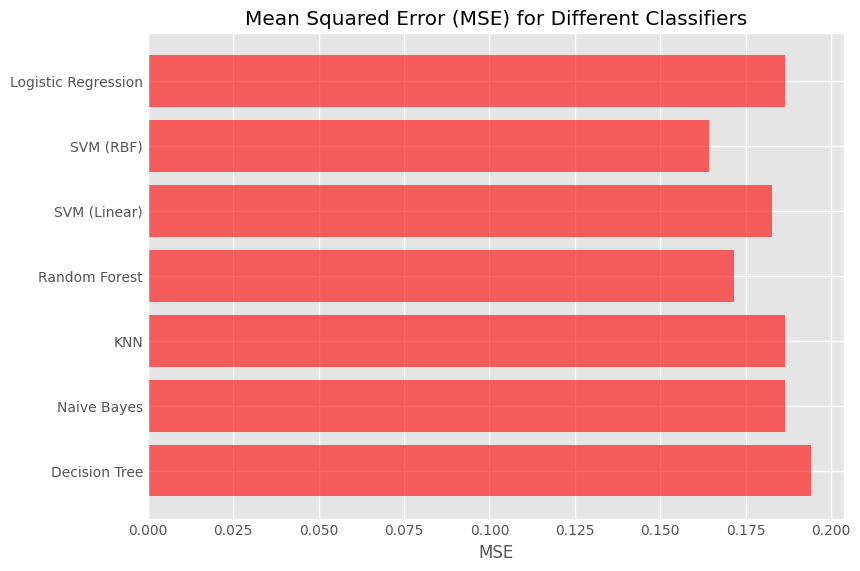

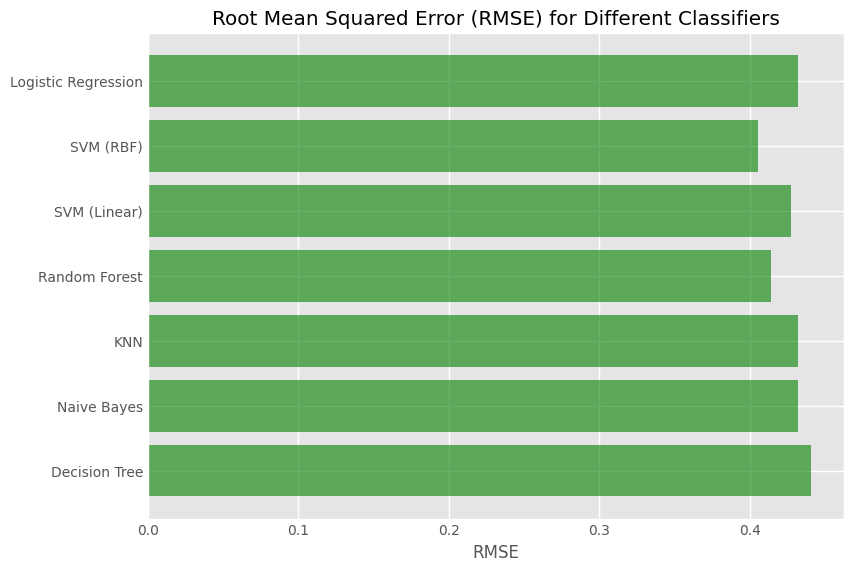

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the data into features (X) and target variable (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Splitting the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM (RBF)': svm.SVC(kernel='rbf', C=1, gamma=0.1),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize lists to store error rates
classifier_names = []
mae_scores = []
mse_scores = []
rmse_scores = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(train_X, train_Y)

    # Make predictions
    predictions = clf.predict(test_X)

    # Error rate calculations
    mae = metrics.mean_absolute_error(test_Y, predictions)
    mse = metrics.mean_squared_error(test_Y, predictions)
    rmse = np.sqrt(mse)

    # Append evaluation metrics to the lists
    classifier_names.append(clf_name)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Plotting MAE
plt.figure(figsize=(8, 6))
plt.barh(classifier_names, mae_scores, color='b', alpha=0.6)
plt.xlabel('MAE')
plt.title('Mean Absolute Error (MAE) for Different Classifiers')
plt.gca().invert_yaxis()  # Invert y-axis to have the classifiers listed from top to bottom
plt.show()

# Plotting MSE
plt.figure(figsize=(8, 6))
plt.barh(classifier_names, mse_scores, color='r', alpha=0.6)
plt.xlabel('MSE')
plt.title('Mean Squared Error (MSE) for Different Classifiers')
plt.gca().invert_yaxis()  # Invert y-axis to have the classifiers listed from top to bottom
plt.show()

# Plotting RMSE
plt.figure(figsize=(8, 6))
plt.barh(classifier_names, rmse_scores, color='g', alpha=0.6)
plt.xlabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Classifiers')
plt.gca().invert_yaxis()  # Invert y-axis to have the classifiers listed from top to bottom
plt.show()
